# 1 Project overview

**About Dataset** </br>
A food delivery service is facing challenges in achieving profitability across its operations. With a dataset of 1,000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for improvement.</br>

The dataset contains comprehensive details on food orders, including Order ID, Customer ID, Restaurant ID, Order and Delivery Date and Time, Order Value, Delivery Fee, Payment Method, Discounts and Offers, Commission Fee, Payment Processing Fee, and Refunds/Chargebacks. This data provides a foundation for analyzing the cost structure and profitability of the food delivery service.

**Objectives:**

- Cost Analysis
- Profitability Evaluation
- Restaurants Analysis

# 2 Preparation

## 2.1 Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Reading dataset

In [3]:
df = pd.read_csv(r"food_orders_new_delhi.csv")

# 3 Initial screening

In [4]:
df.shape

(1000, 12)

In [5]:
df.head(4)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [7]:
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

# 4 Data cleaning

## 4.1 Missing values

In [8]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

## 4.2 Duplicate values

In [9]:
df.duplicated().sum()

0

## 4.3 Data transformation

### 4.3.1 Filling missing values

In [10]:
df.fillna(0)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


### 4.3.2 Currency swap from Indian Rupee to Bahraini Dinar (Optional)

In [11]:
exchange_rate_inr_to_bhd = 0.0045  

df["Order Value"] = df["Order Value"] * exchange_rate_inr_to_bhd
df["Payment Processing Fee"] = df["Payment Processing Fee"] * exchange_rate_inr_to_bhd
df["Commission Fee"] = df["Commission Fee"] * exchange_rate_inr_to_bhd
df["Delivery Fee"] = df["Delivery Fee"] * exchange_rate_inr_to_bhd

# 5 Data types

## 5.1 Changing the discount coloumn to integers only

In [12]:
def extract_numeric(par):
    if isinstance(par, str):
        numeric_str = []
        for char in par:
            if char.isnumeric():
                numeric_str.append(char)
        numeric_str = "".join(numeric_str)
        return int(numeric_str)
    else:
        return 0


df["Discounts and Offers"] = df["Discounts and Offers"].apply(extract_numeric)

## 5.2 Creating a new discount amount column

In [13]:
df["Discount Amount"] = df.apply(lambda row: (row["Order Value"] * row["Discounts and Offers"] / 100), axis=1)

# 6 Cost Analysis

In [14]:
df.describe()

,Order ID,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.742860,0.128790,16.265000,0.571455,0.134244,28.300000,0.784160
std,288.819436,2.389389,0.076312,17.626272,0.193788,0.052322,49.614228,1.035717
min,1.000000,0.468000,0.000000,0.000000,0.225000,0.045000,0.000000,0.000000
25%,250.750000,2.689875,0.090000,5.000000,0.405000,0.090000,0.000000,0.120769
50%,500.500000,4.673250,0.135000,10.000000,0.571500,0.135000,0.000000,0.389700
75%,750.250000,6.723000,0.180000,15.000000,0.738000,0.180000,50.000000,0.883800
max,1000.000000,8.977500,0.225000,50.000000,0.900000,0.225000,150.000000,4.482000


## 6.1 Profit calculation

In [15]:
df["Total Cost"] = df["Delivery Fee"] + df["Payment Processing Fee"] + df["Discount Amount"]
df["Revenue"] = df["Commission Fee"]
df["Profit"] = df["Revenue"] - df["Total Cost"]

In [16]:
df["Profit"].mean()

-0.475739325

## 6.2 Total metrics

In [17]:
total_orders = df.shape[0]
total_revenue = df["Revenue"].sum()
total_cost = df["Total Cost"].sum()
total_profit = df["Profit"].sum()

print("Total Orders:",total_orders)
print("Total_Revenue:",total_revenue)
print("Total Cost:",total_cost)
print("Total Profit:",total_profit)

Total Orders: 1000
Total_Revenue: 571.4549999999999
Total Cost: 1047.194325
Total Profit: -475.739325


### 6.2.1 Profitability ratio

In [18]:
profit_ratio = total_profit / total_revenue
print(profit_ratio)

-0.8325053153791638


## 6.3 Cost breakdown

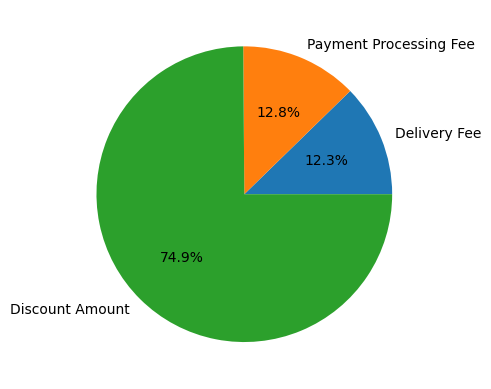

In [19]:
costs_breakdown = df[["Delivery Fee", "Payment Processing Fee", "Discount Amount"]].sum()

plot = plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%')

## 6.5 Cost-Revenue-Profit Time series analysis

In [20]:
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])

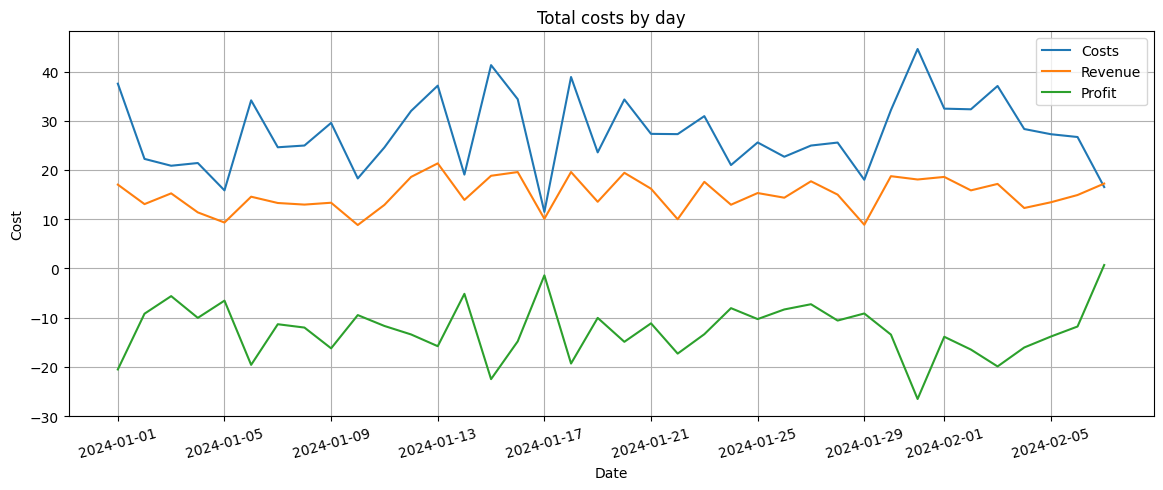

In [35]:
df["Order Date"] = df["Order Date and Time"].dt.date

cost_by_date = df.groupby("Order Date")["Total Cost"].sum().reset_index()

revenue_by_date = df.groupby("Order Date")["Revenue"].sum().reset_index()

profit_by_date = df.groupby("Order Date")["Profit"].sum().reset_index()



plt.figure(figsize=(14, 5))
plt.xticks(rotation=15)

plt.plot(cost_by_date["Order Date"], cost_by_date["Total Cost"], label="Costs")

plt.plot(revenue_by_date["Order Date"], revenue_by_date["Revenue"], label="Revenue")

plt.plot(profit_by_date["Order Date"], profit_by_date["Profit"], label="Profit")


plt.title('Total costs by day')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

# 7 Restaurant popularity chart

<Axes: xlabel='Restaurant ID', ylabel='count'>

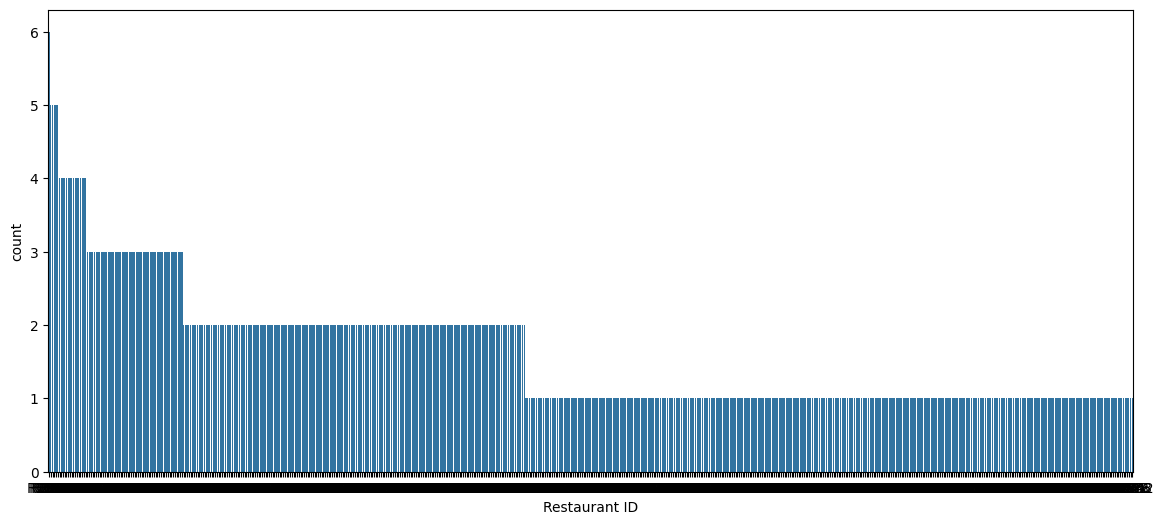

In [37]:
restaurant_counts = df["Restaurant ID"].value_counts().reset_index()



plt.figure(figsize=(14, 6))
sns.barplot(x='Restaurant ID', y='count', data=restaurant_counts)

## 7.1 Top 5 Restaurants

In [38]:
print(restaurant_counts.head(5))

  Restaurant ID  count
0         R2317      6
1         R2804      5
2         R2726      5
3         R2523      5
4         R2016      5


In [40]:
test = df.groupby("Restaurant ID")["Profit"].sum().reset_index()

In [46]:
test.sort_values(by="Profit", ascending=False)

,Restaurant ID,Profit
560,R2915,1.119600
344,R2570,1.106325
152,R2250,0.949725
567,R2925,0.886050
470,R2778,0.871875
...,...,...
181,R2300,-5.509350
356,R2587,-5.620500
232,R2377,-5.816250
238,R2386,-6.493500
